In [72]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
import pandas as pd

# Load the data
data = pd.read_csv('ratings_small.csv')

# Display the first few rows of the data
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [35]:
pd.options.display.float_format = '{:,.2f}'.format

In [9]:
data.shape

(100004, 4)

In [4]:
# Load the movie metadata
movies_metadata = pd.read_csv('movies_metadata.csv', low_memory=False)

# Display the first few rows of the movie metadata
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [40]:
#Converting to millions
movies_metadata['budget'] = pd.to_numeric(movies_metadata['budget'], errors='coerce') / 1e6
movies_metadata['revenue'] = pd.to_numeric(movies_metadata['revenue'], errors='coerce') / 1e6

In [41]:
missing_values = movies_metadata.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

belongs_to_collection    40972
homepage                 37684
poster_path                386
runtime                    263
release_date                90
release_year                90
status                      87
imdb_id                     17
original_language           11
revenue                      6
spoken_languages             6
title                        6
video                        6
vote_average                 6
vote_count                   6
popularity                   5
production_companies         3
production_countries         3
budget                       3
dtype: int64

In [10]:
movies_metadata.shape

(45466, 26)

In [ ]:
# Handle missing values
movies_metadata['overview'] = movies_metadata['overview'].fillna('')
movies_metadata['tagline'] = movies_metadata['tagline'].fillna('')
movies_metadata['genres'] = movies_metadata['genres'].fillna('')

### Distribution of Movie Runtimes

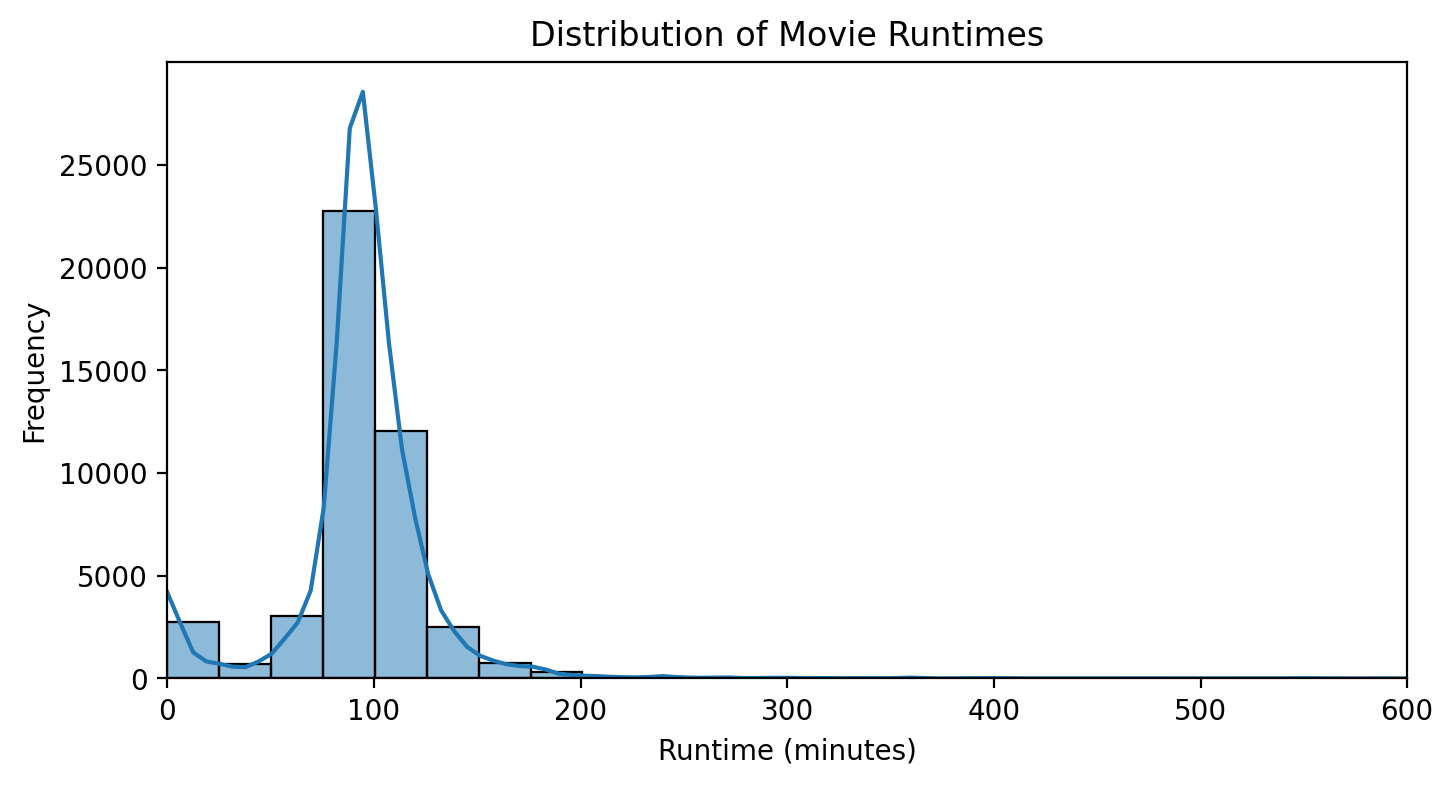

In [44]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 4),dpi=200)

# Distribution of movie runtimes
sns.histplot(movies_metadata['runtime'], bins=50, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 600)
plt.show()

### Top Genres

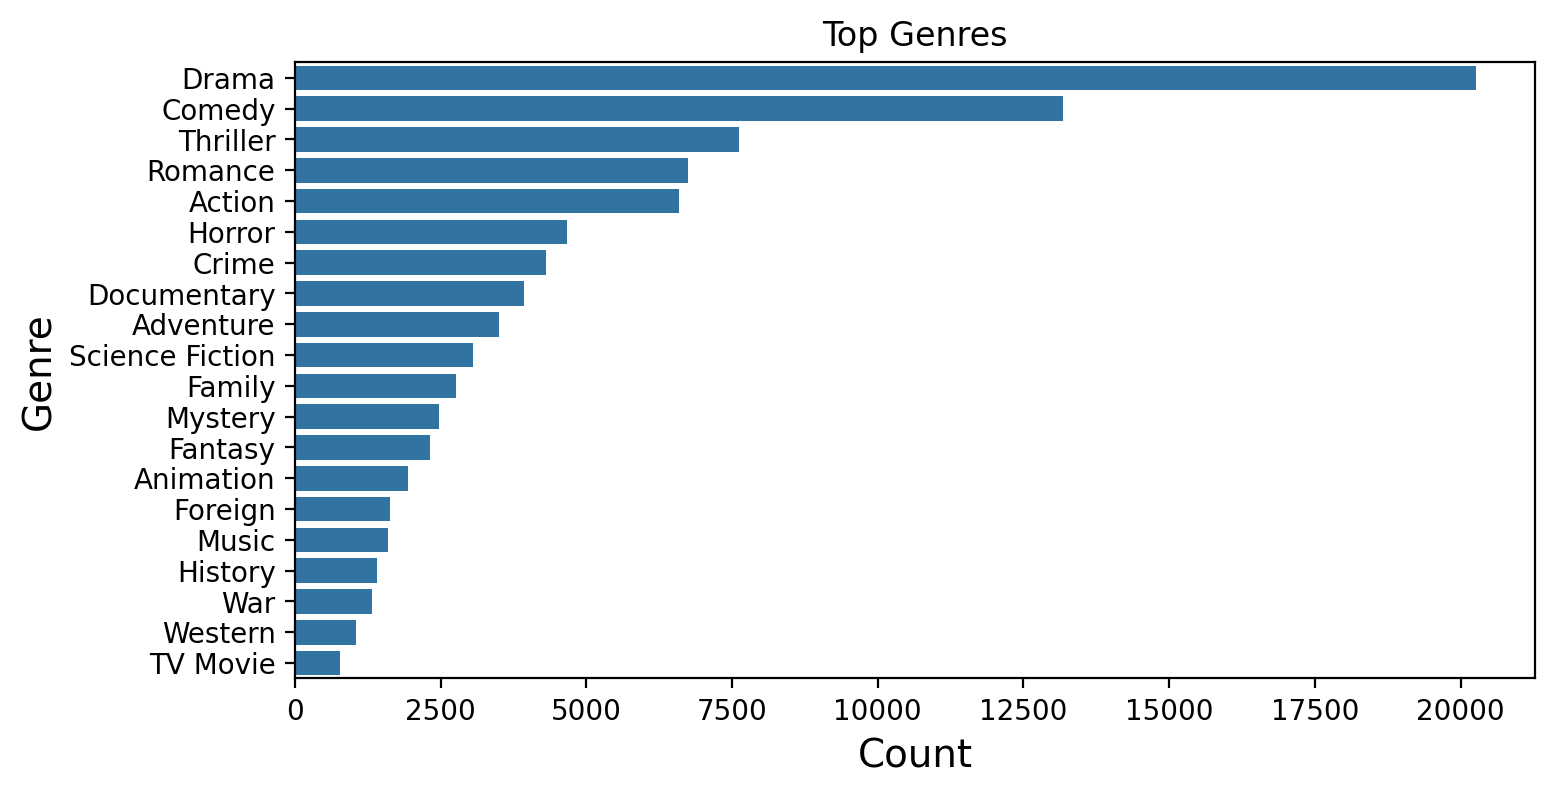

In [65]:
from collections import Counter

# Extract genres
genres_list = movies_metadata['genres'].dropna().apply(lambda x: [genre['name'] for genre in ast.literal_eval(x)])
genres_flat = [genre for sublist in genres_list for genre in sublist]
genres_count = Counter(genres_flat)

# Convert to DataFrame for plotting
genres_df = pd.DataFrame(genres_count.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Set up the matplotlib figure
plt.figure(figsize=(8, 4),dpi=200)

# Bar plot for top genres
sns.barplot(x='Count', y='Genre', data=genres_df[:20])
plt.title('Top Genres')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre',  fontsize=14)
plt.show()

### Revenue vs Budget

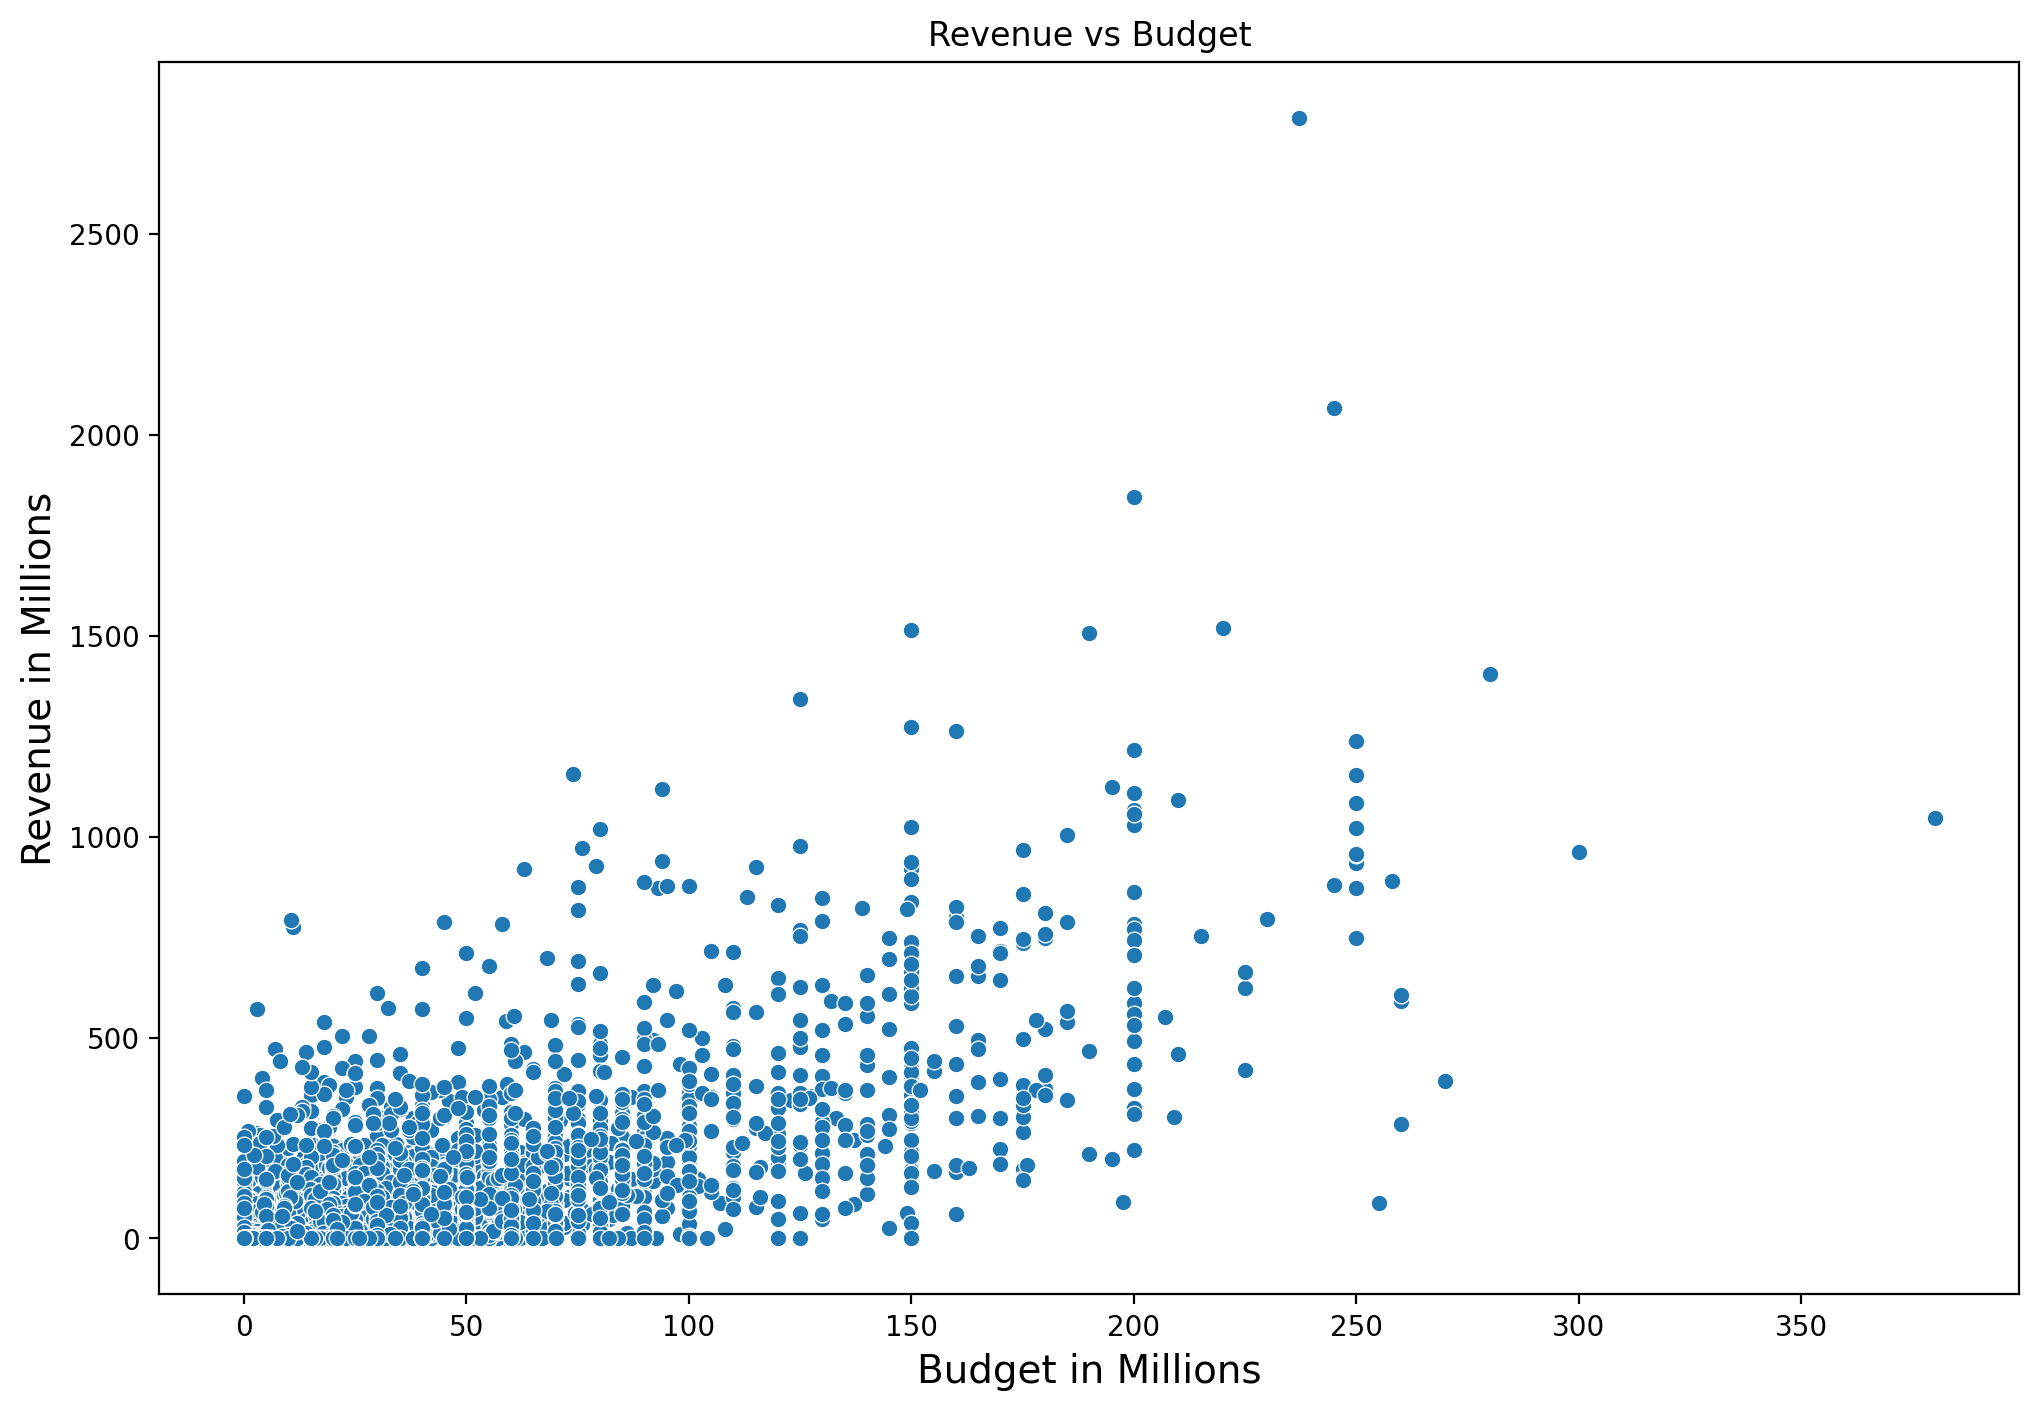

In [63]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=200)

# Scatter plot for revenue vs budget
sns.scatterplot(x='budget', y='revenue', data=movies_metadata)
plt.title('Revenue vs Budget')
plt.xlabel('Budget in Millions', fontsize=14)
plt.ylabel('Revenue in Millions', fontsize=14)
plt.show()

### Revenue vs Vote Average

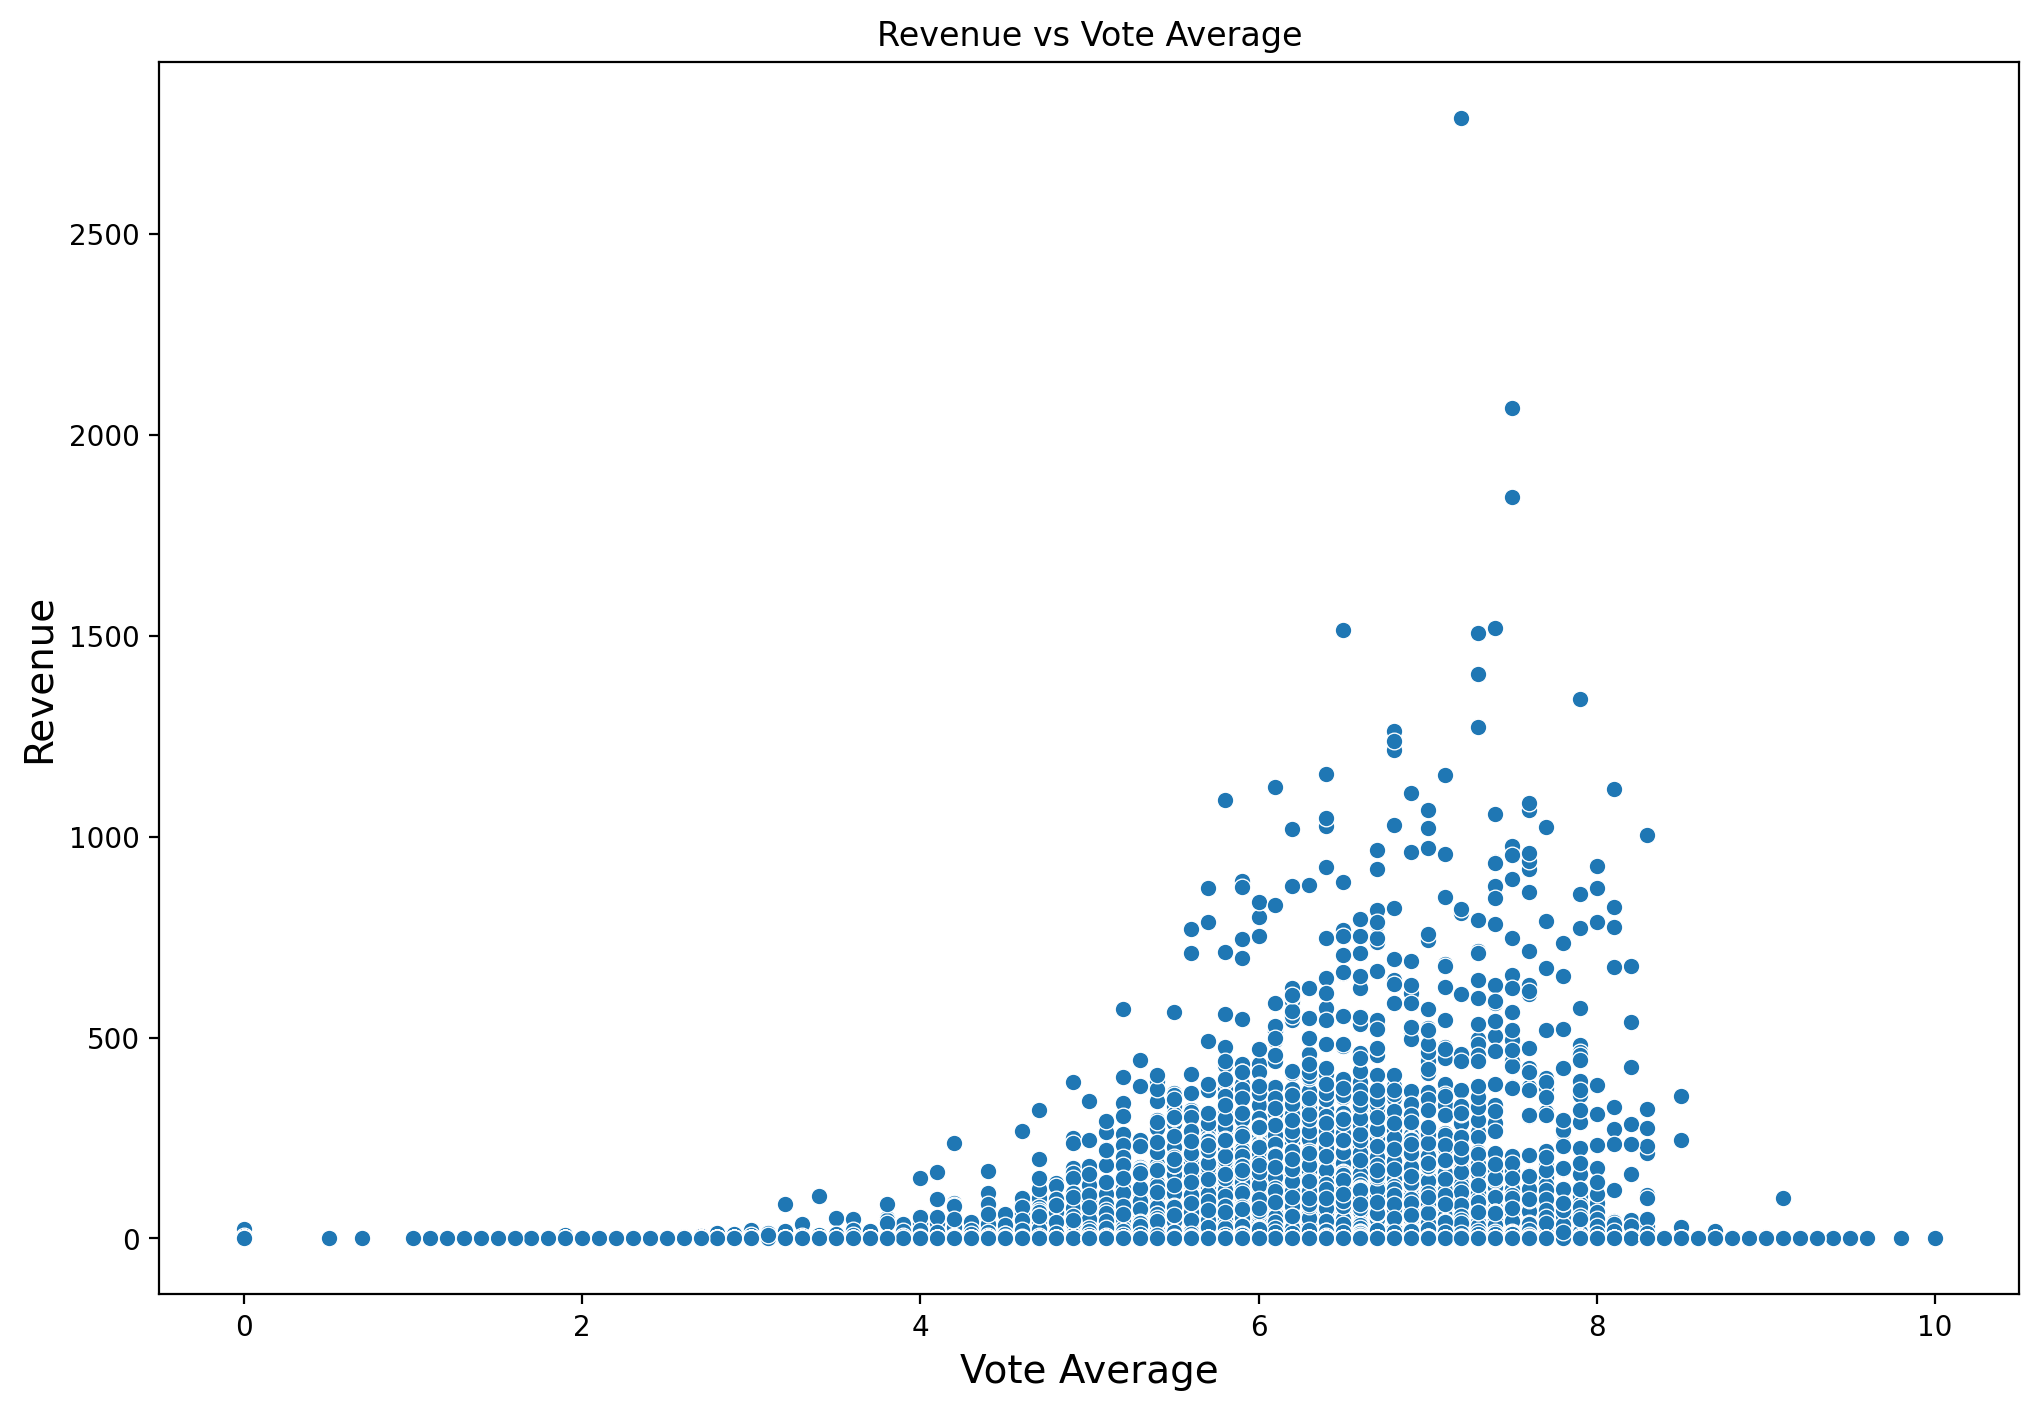

In [50]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=200)

# Scatter plot for revenue vs vote average
sns.scatterplot(x='vote_average', y='revenue', data=movies_metadata)
plt.title('Revenue vs Vote Average')
plt.xlabel('Vote Average', fontsize=14)
plt.ylabel('Revenue in Millions', fontsize=14)
plt.show()

### Trends Over Time

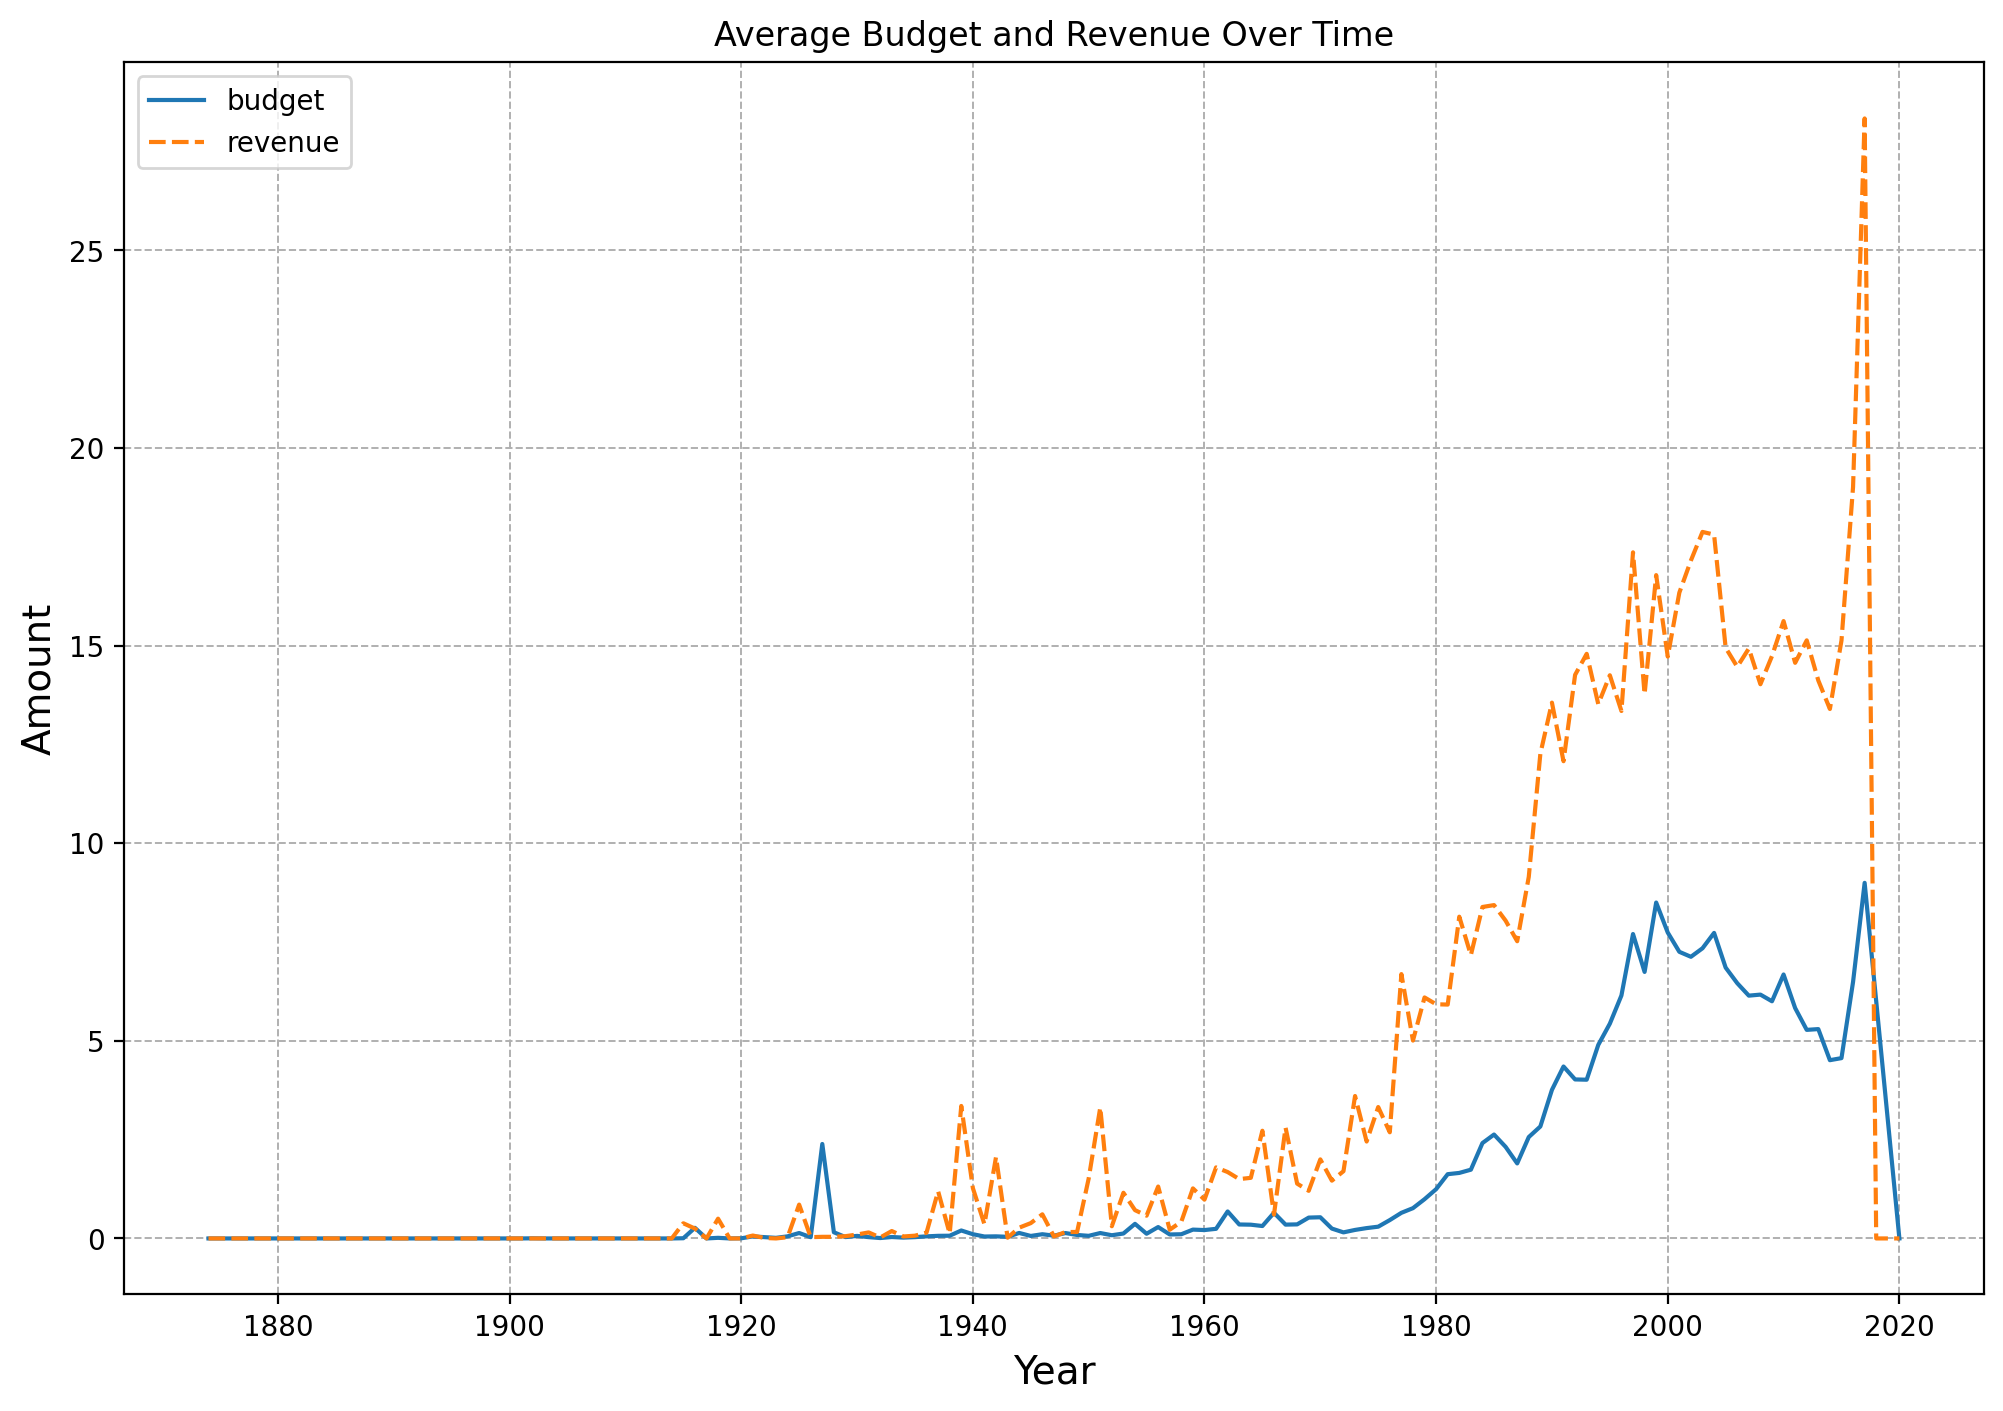

In [71]:
# Convert release_date to datetime
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')

# Extract year from release_date
movies_metadata['release_year'] = movies_metadata['release_date'].dt.year

# Group by release year and calculate average budget and revenue
yearly_data = movies_metadata.groupby('release_year')[['budget', 'revenue']].mean().dropna()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=200)

# Line plot for average budget and revenue over years
sns.lineplot(data=yearly_data)
plt.title('Average Budget and Revenue Over Time')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

### Genre Analysis

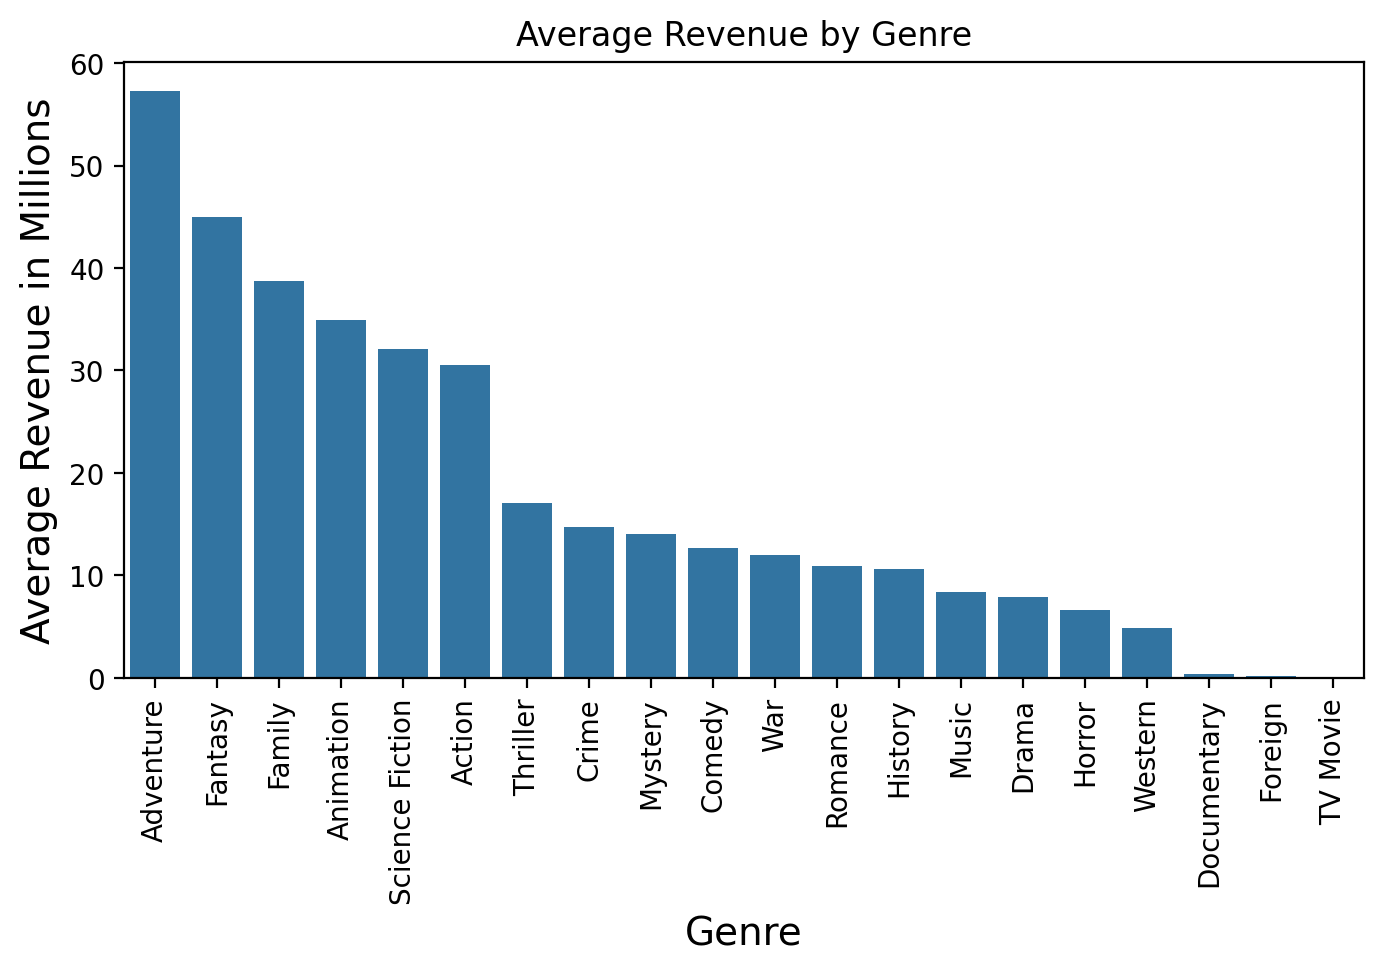

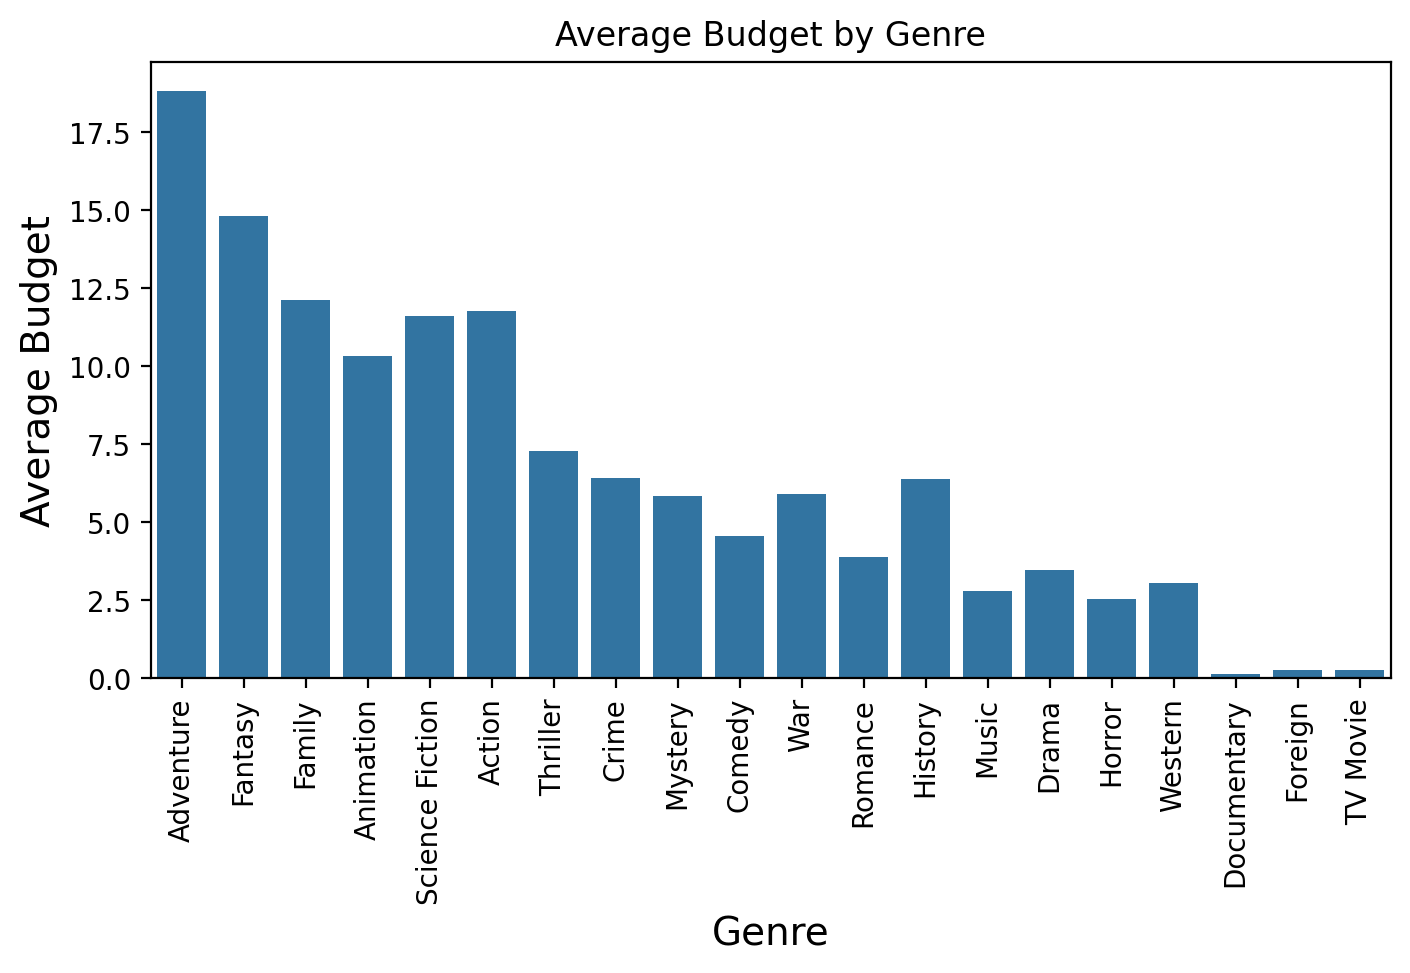

In [62]:
# Extract genres and calculate average revenue and budget for each genre
genre_revenue_budget = []

for genres, revenue, budget in zip(movies_metadata['genres'], movies_metadata['revenue'], movies_metadata['budget']):
    if pd.notna(genres):
        genre_list = [genre['name'] for genre in ast.literal_eval(genres)]
        for genre in genre_list:
            genre_revenue_budget.append((genre, revenue, budget))

genre_df = pd.DataFrame(genre_revenue_budget, columns=['Genre', 'Revenue', 'Budget'])
genre_summary = genre_df.groupby('Genre')[['Revenue', 'Budget']].mean().sort_values(by='Revenue', ascending=False)[:20]

# Set up the matplotlib figure
plt.figure(figsize=(8, 4), dpi=200)

# Bar plot for average revenue by genre
sns.barplot(x=genre_summary.index, y='Revenue', data=genre_summary)
plt.title('Average Revenue by Genre')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Revenue in Millions', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Set up the matplotlib figure
plt.figure(figsize=(8, 4), dpi=200)

# Bar plot for average budget by genre
sns.barplot(x=genre_summary.index, y='Budget', data=genre_summary)
plt.title('Average Budget by Genre')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Budget in Millions', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [5]:
# Extract genres from the genres column
def extract_genres(genres_str):
    try:
        genres = eval(genres_str)
        return ' '.join([g['name'] for g in genres])
    except:
        return ''

movies_metadata['genres_str'] = movies_metadata['genres'].apply(extract_genres)

# Combine genres, overview, and tagline into a single string
movies_metadata['combined_text'] = movies_metadata['genres_str'] + ' ' + movies_metadata['overview'] + ' ' + movies_metadata['tagline']

# Display the first few rows of the combined text
movies_metadata[['title', 'combined_text']].head()

,title,combined_text
0,Toy Story,"Animation Comedy Family Led by Woody, Andy's t..."
1,Jumanji,Adventure Fantasy Family When siblings Judy an...
2,Grumpier Old Men,Romance Comedy A family wedding reignites the ...
3,Waiting to Exhale,"Comedy Drama Romance Cheated on, mistreated an..."
4,Father of the Bride Part II,Comedy Just when George Banks has recovered fr...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Compute the TF-IDF matrix for the combined text
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_metadata['combined_text'])

# Display the shape of the TF-IDF matrix
tfidf_matrix.shape

(45466, 77139)

In [7]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
#cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

### Simple recommendation engine

In [8]:
def get_movie_recommendations(title, cosine_sim_matrix=None, top_n=10):
    # Get the index of the movie from its title
    idx = movies_metadata[movies_metadata['title'] == title].index[0]
    
    # If a precomputed cosine similarity matrix is provided, use it
    if cosine_sim_matrix is not None:
        sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    else:
        # Otherwise, compute the cosine similarity scores on-the-fly
        cosine_sim_vector = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()
        sim_scores = list(enumerate(cosine_sim_vector))
    
    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top N most similar movies' indices
    sim_movie_indices = [i[0] for i in sim_scores[1:top_n+1]]
    
    # Return the top N most similar movies
    return movies_metadata['title'].iloc[sim_movie_indices]

# Test the recommendation function with a sample movie
sample_movie = "Star Wars"
recommendations = get_movie_recommendations(sample_movie)
recommendations

1154           The Empire Strikes Back
30434    The Star Wars Holiday Special
1167                Return of the Jedi
26555     Star Wars: The Force Awakens
22939               Threads of Destiny
8850                   The Ice Pirates
22118               The Galaxy Invader
20812                           Erased
26240            Princess and the Pony
1267                      Mad Dog Time
Name: title, dtype: object